In [208]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
from polyfit import load_example, PolynomRegressor, Constraints
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties



# set style
sns.set_style("white")

# Cell doublet

In [ ]:
# set working directory
os.chdir("C:\\Users\\anr9744\\Projects\\Goo\\data")
"C:\\tmp\\sorting_test_rendering"

In [4]:
# load data
with open(f"doublet_polyplot.json", 'r') as f:
    master_dict = json.load(f)

enum = list(range(len(master_dict["Distances"])))
times_tmp = master_dict['Times']
times = [[time / 1000000 for time in times_tmp[i]] for i in enum]
distances = master_dict['Distances']
frames = master_dict['Frames']

len(distances[0])

FileNotFoundError: [Errno 2] No such file or directory: 'doublet_polyplot.json'

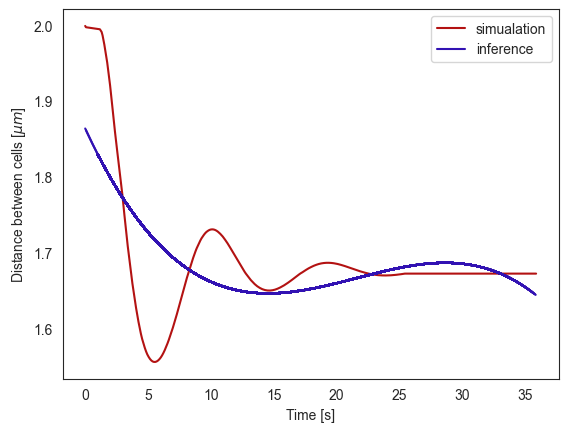

In [ ]:
fig, ax = plt.subplots()

df = pd.DataFrame({'x': times[0],
                   'y': distances[0]})

# fit a polynomial curve on data
poly3 = np.poly1d(np.polyfit(df.x, df.y, deg = 3))
polyline = np.linspace(1, df.x[:-1], 500)


# compute colors
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len([0,1]))
colors = [hsv2rgb(hue) for hue in hues]

# plot
ax.plot(df.x, df.y, color=colors[0])
ax.plot(polyline, poly3(polyline), '-', color=colors[1])

# labels and legend
plt.ylabel(r'Distance between cells [$\mu m$]')
plt.xlabel(r'Time [s]')
#plt.legend(title = r'$falloff\_power = 0;   strength = -1000$')
plt.legend(['simualation', 'inference'])
ax.grid(False)
locs, labels = xticks()

# plot save to data foler
plt.savefig(f"doublet_fit.png", dpi=500)

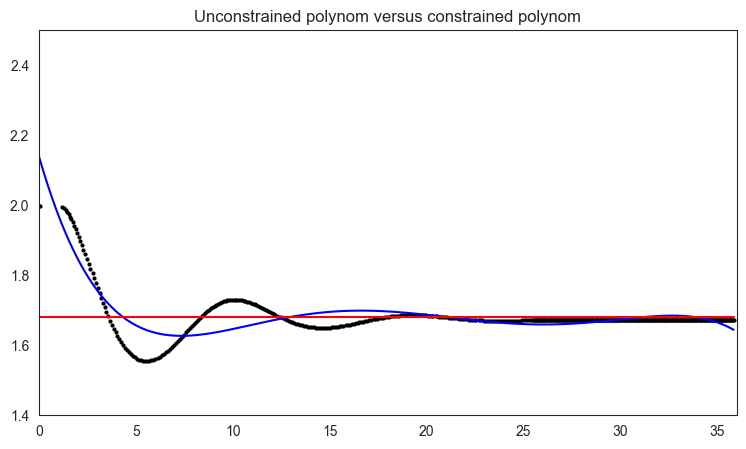

In [ ]:
X, y = np.array(times[0]), np.array(distances[0])
x_plot = np.linspace(0, np.amax(X), 500)

X = X.reshape((-1,1))

DEG = 5

np_coeffs = np.polyfit(X.ravel(), y, DEG)
polyestimator = PolynomRegressor(deg=DEG)
vander = np.vander(x_plot, N = DEG +1)
pred_numpy = vander@np_coeffs

polyestimator = PolynomRegressor(deg=DEG)
monotone_constraint = Constraints(monotonicity='inc')
polyestimator.fit(X, y, loss = 'l2', constraints={0: monotone_constraint})
pred_mon = polyestimator.predict(x_plot.reshape(-1, 1))

f, ax = plt.subplots(1, figsize = (9, 5))
ax.set_xlim(0, 36)
ax.set_ylim(1.4, 2.5)
ax.set_title("Unconstrained polynom versus constrained polynom")
ax.scatter(X, y, c='k', s=4)

ax.plot(x_plot, pred_numpy, c='b', label='Degree=3 Unconstrained')
ax.plot(x_plot, pred_mon, c='r', label='Degree=3 Monotonic')

IndexError: list index out of range

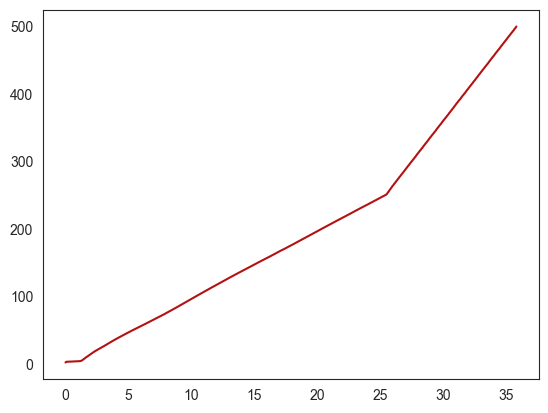

In [ ]:
fig, ax = plt.subplots()

df = pd.DataFrame({'x': times[0],
                   'y': frames[0]})

# fit a polynomial curve on data
poly3 = np.poly1d(np.polyfit(df.x, df.y, deg = 10))
polyline = np.linspace(1, df.x[:-1], 500)


# compute colors
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len(enum))
colors = [hsv2rgb(hue) for hue in hues]

# plot
ax.plot(df.x, df.y, color=colors[0])
ax.plot(polyline, poly3(polyline), '--', color=colors[1])

# labels and legend
plt.ylabel(r'frames')
plt.xlabel(r'time [s]')
#plt.legend(title = r'$falloff\_power = 0;   strength = -1000$')
plt.legend(['simulation', 'inference'])
ax.grid(False)
locs, labels = xticks()

# plot save to data foler
#plt.savefig(f"doublet_fit.png", dpi=500)
#plt.plot(times[0], frames[0], "-")

A = 0.424762869999274
w = 0.6699785990110304
phi = -0.8305179147014226
c = 4.754169482728897
k = 1.6740356019796734


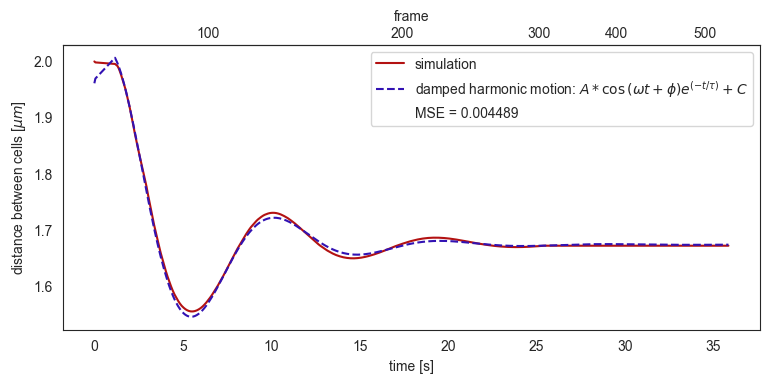

In [ ]:
### mapping from time to frame
df = pd.DataFrame({'x': times[0], 'y': frames[0]})
# fit a polynomial curve on forward data
poly3_forward = np.poly1d(np.polyfit(df.x, df.y, deg = 5))
# fit a polynomial curve on reverse data
poly3_reverse = np.poly1d(np.polyfit(df.y, df.x, deg = 5))

### fitting hyperbola to simulation data
def polynomial(df, deg):
    # fit a polynomial curve on data
    poly3 = np.poly1d(np.polyfit(df.x, df.y, deg = deg))

    return poly3, polyline

def hyperbola(a, b, x):
    return a*0.3 / x + b*1.66

def damped_harmonic_motion(t, A, omega, phi, tau, C):
    return A * np.exp(-t/tau) * np.cos(omega*t + phi) + C

x, y = np.array(times[0]), np.array(distances[0])
t = np.linspace(1, x[:-1], 500)

# compute colors
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len([0,1]))
colors = [hsv2rgb(hue) for hue in hues]

# plot
f, ax1 = plt.subplots(1, figsize = (9, 3.7))

# Use the curve_fit function to fit the hyperbolic curve
popt, pcov = curve_fit(damped_harmonic_motion, x, y)

# Compute the root-mean-square error (RMSE)
y_fit = damped_harmonic_motion(x, *popt)
rmse = np.sqrt(np.mean((y - y_fit)**2))

# Print the fitted parameter values
print('A =', popt[0])
print('w =', popt[1])
print('phi =', popt[2])
print('c =', popt[3])
print('k =', popt[4])

ax1.plot(x, y, color = colors[0], label = 'simulation')
ax1.plot(x, damped_harmonic_motion(x, *popt), '--', color = colors[1], label =  r'damped harmonic motion: ${A} * \cos{{(\omega t + \phi)}} e^{{(-t/\tau)}} + C$')
# Create empty plot with blank marker containing the extra label
ax1.plot([], [], ' ', label=f'MSE = {rmse:.6f}')

# layout
plt.setp(ax1.get_xticklabels(), visible=True)
ax2 = ax1.secondary_xaxis('top', functions=(poly3_forward, poly3_reverse))
ax2.set_xlabel(r'frame')
#plt.setp(ax2.get_xticklabels(), visible=True)
ax2.tick_params(axis='both', which='both', length=0)

plt.ylabel(r'distance between cells [$\mu m$]')
plt.xlabel(r'time [s]')
#plt.legend(['simulation', r'${A} * \cos{{(\omega t + \phi)}} e^{{(-t/\tau)}} + C$'])
plt.legend()


plt.savefig(f"doublet_hyperbola.png", dpi=500)
plt.savefig(f"doublet_fit.png", dpi=500)
plt.show()

# Sorting score

In [6]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080seed1")

# load data
with open(f"data1.json", 'r') as f1:
    data1 = json.load(f1)

with open(f"data1_time.json", 'r') as f2:
    times1 = json.load(f2)
    times1 = [float(time) / 60 for time in list(times1.values())]


In [7]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX4090seed1")

# load data
with open(f"RTX4090_data1.json", 'r') as f1:
    data2 = json.load(f1)

with open(f"RTX4090_data1_time.json", 'r') as f2:
    times2 = json.load(f2)
    times2 = [float(time) / 60 for time in list(times2.values())]


In [8]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080seed2")

# load data
with open(f"data2.json", 'r') as f1:
    data3 = json.load(f1)

with open(f"data2_time.json", 'r') as f2:
    times3 = json.load(f2)
    times3 = [float(time) / 60 for time in list(times3.values())]

In [9]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080seed4")

# load data
with open(f"data4.json", 'r') as f1:
    data4 = json.load(f1)

with open(f"data4_time.json", 'r') as f2:
    times4 = json.load(f2)
    times4 = [float(time) / 60 for time in list(times4.values())]

In [10]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX4090seed3")

# load data
with open(f"data3.json", 'r') as f1:
    data5 = json.load(f1)

with open(f"data3_time.json", 'r') as f2:
    times5 = json.load(f2)
    times5 = [float(time) / 60 for time in list(times5.values())]

In [11]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080motion250")

# load data
with open(f"data1.json", 'r') as f1:
    data6 = json.load(f1)

with open(f"data1_time.json", 'r') as f2:
    times6 = json.load(f2)
    times6 = [float(time) / 60 for time in list(times6.values())]

In [12]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX4090seed5")

# load data
with open(f"data5.json", 'r') as f1:
    data7 = json.load(f1)

with open(f"data5_time.json", 'r') as f2:
    times7 = json.load(f2)
    times7 = [float(time) / 60 for time in list(times7.values())]

In [13]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080motion250seed2")

# load data
with open(f"data2.json", 'r') as f1:
    data8 = json.load(f1)

with open(f"data2_time.json", 'r') as f2:
    times8 = json.load(f2)
    times8 = [float(time) / 60 for time in list(times8.values())]

In [14]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080motion250seed3")

# load data
with open(f"RTX3080motion250seed3.json", 'r') as f1:
    data9 = json.load(f1)

with open(f"RTX3080motion250seed3_time.json", 'r') as f2:
    times9 = json.load(f2)
    times9 = [float(time) / 60 for time in list(times9.values())]

In [15]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080motion250seed4")

# load data
with open(f"data4.json", 'r') as f1:
    data10 = json.load(f1)

with open(f"data4_time.json", 'r') as f2:
    times10 = json.load(f2)
    times10 = [float(time) / 60 for time in list(times10.values())]

In [16]:
# set working directory
os.chdir("C:\\tmp\\adhesion-based-sorting\\RTX3080motion250seed5")

# load data
with open(f"data5.json", 'r') as f1:
    data11 = json.load(f1)

with open(f"data5_time.json", 'r') as f2:
    times11 = json.load(f2)
    times11 = [float(time) / 60 for time in list(times11.values())]

In [21]:
frames = [int(frame) for frame in list(data1.keys())]
values1_cellsB = [data1[frame]["A_Cells"] for frame in data1]
values1_cellsA = [data1[frame]["B_Cells"] for frame in data1]

frames2 = [int(frame) for frame in list(data2.keys())]
values2_cellsB = [data2[frame]["A_Cells"] for frame in data2]
values2_cellsA = [data2[frame]["B_Cells"] for frame in data2]

frames3 = [int(frame) for frame in list(data3.keys())]
values3_cellsB = [data3[frame]["A_Cells"] for frame in data3]
values3_cellsA = [data3[frame]["B_Cells"] for frame in data3]

frames4 = [int(frame) for frame in list(data4.keys())]
values4_cellsB = [data4[frame]["A_Cells"] for frame in data4]
values4_cellsA = [data4[frame]["B_Cells"] for frame in data4]

frames5 = [int(frame) for frame in list(data5.keys())]
values5_cellsB = [data5[frame]["A_Cells"] for frame in data5]
values5_cellsA = [data5[frame]["B_Cells"] for frame in data5]

frames6 = [int(frame) for frame in list(data6.keys())]
values6_cellsB = [data6[frame]["A_Cells"] for frame in data6]
values6_cellsA = [data6[frame]["B_Cells"] for frame in data6]

frames7 = [int(frame) for frame in list(data7.keys())]
values7_cellsB = [data7[frame]["A_Cells"] for frame in data7]
values7_cellsA = [data7[frame]["B_Cells"] for frame in data7]

frames8 = [int(frame) for frame in list(data8.keys())]
values8_cellsB = [data8[frame]["A_Cells"] for frame in data8]
values8_cellsA = [data8[frame]["B_Cells"] for frame in data8]

frames9 = [int(frame) for frame in list(data9.keys())]
values9_cellsB = [data9[frame]["A_Cells"] for frame in data9]
values9_cellsA = [data9[frame]["B_Cells"] for frame in data9]

frames10 = [int(frame) for frame in list(data10.keys())]
values10_cellsB = [data10[frame]["A_Cells"] for frame in data10]
values10_cellsA = [data10[frame]["B_Cells"] for frame in data10]

frames11 = [int(frame) for frame in list(data11.keys())]
values11_cellsB = [data11[frame]["A_Cells"] for frame in data11]
values11_cellsA = [data11[frame]["B_Cells"] for frame in data11]

498
498
498
498
82.04165545000001
81.74757711666666
93.11912838333333


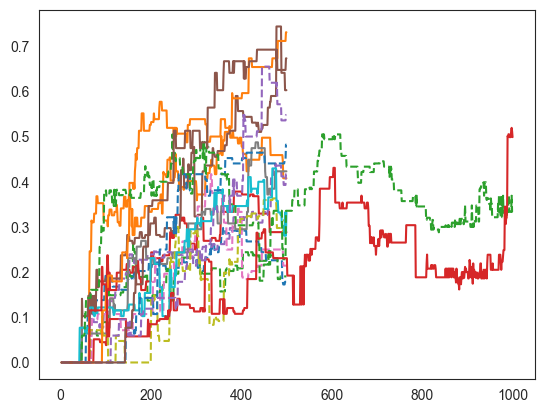

In [22]:

print(len(values1_cellsA))
print(len(values1_cellsB))
print(len(frames1))
print(len(times1))
print(times2[-1])
print(times5[-1])
print(times7[498])

plt.plot(frames1, values1_cellsA, '--')
plt.plot(frames1, values1_cellsB)

plt.plot(frames2, values2_cellsA, '--')
plt.plot(frames2, values2_cellsB)

plt.plot(frames3, values3_cellsA, '--')
plt.plot(frames3, values3_cellsB)

plt.plot(frames4, values4_cellsA, '--')
plt.plot(frames4, values4_cellsB)

plt.plot(frames5, values5_cellsA, '--')
plt.plot(frames5, values5_cellsB)

plt.plot(frames6, values6_cellsA, '--')
plt.plot(frames6, values6_cellsB)

plt.plot(frames7, values7_cellsA, '--')
plt.plot(frames7, values7_cellsB)

plt.plot(frames8, values8_cellsA, '--')
plt.plot(frames8, values8_cellsB)

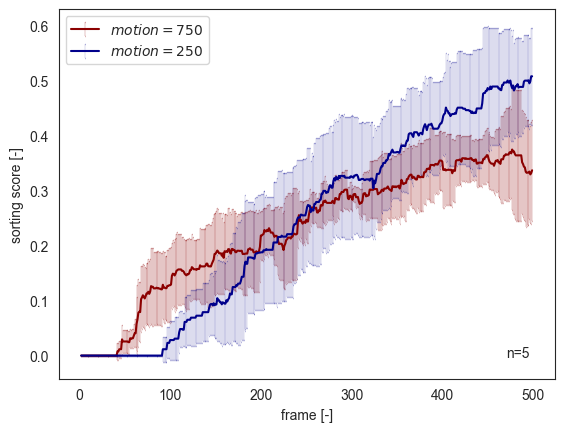

In [52]:
# random motion = -750
averages1 = [sum(items) / len(items) for items in zip(*[values1_cellsA, values1_cellsB])]
averages2 = [sum(items) / len(items) for items in zip(*[values2_cellsA, values2_cellsB])]
averages3 = [sum(items) / len(items) for items in zip(*[values3_cellsA, values3_cellsB])]
averages4 = [sum(items) / len(items) for items in zip(*[values4_cellsA, values4_cellsB])]
averages5 = [sum(items) / len(items) for items in zip(*[values5_cellsA, values5_cellsB])]
# Calculate mean and standard deviation
mean_values = np.mean([averages1, averages2, averages3, averages4, averages5], axis=0)
std_values = np.std([averages1, averages2, averages3, averages4, averages5], axis=0)

# random motion = -250
averages6 = [sum(items) / len(items) for items in zip(*[values6_cellsA, values6_cellsB])]
averages8 = [sum(items) / len(items) for items in zip(*[values8_cellsA, values8_cellsB])]
averages9 = [sum(items) / len(items) for items in zip(*[values9_cellsA, values9_cellsB])]
averages10 = [sum(items) / len(items) for items in zip(*[values10_cellsA, values10_cellsB])]
averages11 = [sum(items) / len(items) for items in zip(*[values11_cellsA, values11_cellsB])]

# Calculate mean and standard deviation
mean_values250 = np.mean([averages6, averages8, averages9, averages10, averages11], axis=0)
std_values250 = np.std([averages6, averages8, averages9, averages10, averages11], axis=0)

# Normalize mean and standard deviation
normalized_mean = (mean_values - np.min(mean_values)) / (np.max(mean_values) - np.min(mean_values))
normalized_std = std_values / (np.max(mean_values) - np.min(mean_values))

#normalized_std = np.minimum(normalized_std, 1.0)

# Plot mean with standard deviation
plt.errorbar(frames, mean_values, yerr=std_values, fmt='-', 
             color = 'darkred', ecolor = 'darkred', 
             capsize = 0.1, elinewidth = 0.17, capthick = 1,  
             label='n=5')

plt.errorbar(frames, mean_values250, yerr=std_values250, fmt='-', 
             color = 'darkblue', ecolor = 'darkblue', 
             capsize = 0.1, elinewidth = 0.1, capthick = 1,  
             label='n=5')

#plt.plot(frames6, averages6)

# labels and legend
plt.ylabel(r'sorting score [-]')
plt.xlabel(r'frame [-]')
#plt.legend(title = r'$falloff\_power = 0;   strength = -1000$')
plt.legend([r'$motion = 750$', r'$motion = 250$', r'n=5'])
plt.text(0.95, 0.05, r'n=5', ha='right', va='bottom', transform=plt.gca().transAxes)
locs, labels = xticks()

# plot save to data foler
plt.savefig(f"sorting_score.png", transparent = False, dpi=500)

# MSD

In [212]:
# set working directory
os.chdir("C:\\tmp\\differential_motion\\new")


directory = "C:\\tmp\\differential_motion\\new"  # Replace with the actual directory path

msd_dicts = []
msd_vars = []
msd_files = []

for index, filename in enumerate(os.listdir(directory)):
    if filename.endswith("msd.json"):
        msd_files.append(filename)

for index, filename in enumerate(msd_files):
    file_path = os.path.join(directory, filename)
    with open(file_path, 'r') as f:
        msd_data = json.load(f)
        globals()["msd" + str(index)] = msd_data
        msd_dicts.append(globals()["msd" + str(index)])
        msd_vars.append("msd" + str(index))
print(msd_vars)


'''with open(f"data2_new_msd.json", 'r') as f6:
    msd6 = json.load(f6)

with open(f"data3_new_msd.json", 'r') as f6:
    msd7 = json.load(f6)

with open(f"data4_new_msd.json", 'r') as f6:
    msd8 = json.load(f6)

with open(f"data5_new_msd.json", 'r') as f6:
    msd9 = json.load(f6)

with open(f"data6_new_msd.json", 'r') as f6:
    msd10 = json.load(f6)'''



['msd0', 'msd1', 'msd2', 'msd3', 'msd4', 'msd5', 'msd6', 'msd7', 'msd8', 'msd9', 'msd10', 'msd11', 'msd12', 'msd13', 'msd14', 'msd15', 'msd16', 'msd17', 'msd18', 'msd19', 'msd20', 'msd21', 'msd22', 'msd23', 'msd24', 'msd25', 'msd26', 'msd27', 'msd28', 'msd29']


'with open(f"data2_new_msd.json", \'r\') as f6:\n    msd6 = json.load(f6)\n\nwith open(f"data3_new_msd.json", \'r\') as f6:\n    msd7 = json.load(f6)\n\nwith open(f"data4_new_msd.json", \'r\') as f6:\n    msd8 = json.load(f6)\n\nwith open(f"data5_new_msd.json", \'r\') as f6:\n    msd9 = json.load(f6)\n\nwith open(f"data6_new_msd.json", \'r\') as f6:\n    msd10 = json.load(f6)'

{'cell_A1_tracks': [8.356459310721457e-09, 1.624396108434666e-08, 1.179566270320355e-08, 1.7893477866842682e-08, 1.1381193098437222e-08, 7.84612692812506e-09, 1.5991699801322323e-08, 3.876326807441364e-08, 3.339566255939074e-08, 7.401909192798452e-08, 3.814112324557503e-08, 1.2392576388186504e-07, 5.980022599134272e-08, 5.6874311620693945e-08, 2.7965512200247053e-08, 6.415187181045457e-08, 5.926808653796391e-08, 5.798416501323669e-07, 5.750763405693506e-07, 1.3286225354832623e-08, 4.447436217416593e-08, 2.2753652443412634e-08, 4.322979750565325e-08, 1.1519455446405869e-07, 3.870127035015141e-07, 4.506995205333813e-07, 6.544087431290477e-08, 8.896316461544469e-08, 2.4818221728126633e-08, 9.348210774188166e-09, 4.8670319752177484e-08, 3.470036518515186e-08, 2.038737990315207e-07, 6.887803932785395e-08, 6.748706232286846e-08, 4.4716338372962844e-08, 1.2672413916354276e-08, 1.0489773920773763e-08, 3.9502735102480006e-08, 4.5062242193300576e-08, 1.4464386112641226e-07, 9.215575849263042e-08

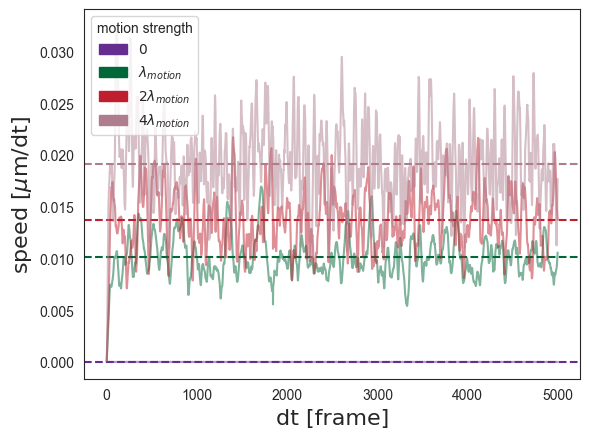

In [253]:
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.patches import Patch

import os
os.chdir("C:\\tmp\\differential_motion\\")

with open(f"data_test_speed10_speed.json", 'r') as f6:
    speed1 = json.load(f6)
with open(f"data_test_speed20_speed.json", 'r') as f6:
    speed2 = json.load(f6)
with open(f"data_test_speed30_speed.json", 'r') as f6:
    speed3 = json.load(f6)
with open(f"data_test_speed40_speed.json", 'r') as f6:
    speed4 = json.load(f6)
with open(f"data_test_speed50_speed.json", 'r') as f6:
    speed5 = json.load(f6)

merged_dict = {}
for key in speed1:
    merged_dict[key] = [(speed1[key][i] + speed2[key][i] + speed3[key][i] + speed4[key][i] + speed5[key][i]) / 5 for i in range(len(speed1[key]))]

print(merged_dict)

color_palette = ['#662D91', '#006838', '#BE1E2D', '#AE7E8E']

# Create a list to store legend handles
legend_handles = []

# Define the legend labels
legend_labels = [r'$0$', r'$\lambda_{motion}$', r'2$\lambda_{motion}$', r'4$\lambda_{motion}$']

# Create a list to store mean speeds
mean_speeds = []

# Plot each track
for idx, (key, values) in enumerate(merged_dict.items()):
    # Get the color based on the index in the color palette
    color = color_palette[idx % len(color_palette)]

    plt.plot(values, color=color, alpha=0.5)

    # Calculate the mean of the track
    track_mean = np.mean(values)

    # Create a legend handle with the plot
    legend_handle = Patch(color=color, label=legend_labels[idx])
    legend_handles.append(legend_handle)

    # Plot the mean as a horizontal line
    plt.axhline(track_mean, color=color, linestyle='--')

# Set the font properties for the legend
legend_font_props = {'family': 'Myriad Pro', 'size': 10}
plt.legend(handles=legend_handles, title='motion strength', prop=legend_font_props)

# Set the font properties for the axis labels
axis_label_font_props = {'family': 'Myriad Pro', 'size': 16}
plt.xlabel(r'dt [frame]', fontdict=axis_label_font_props)
plt.ylabel(r'speed [$\mu$m/dt]', fontdict=axis_label_font_props)

# Save the plot to the data folder
plt.savefig(f"speed.png", transparent=False, dpi=500)

# Display the plot
plt.show()


{'cell_A1_tracks': [8.470010044341756e-17, 5.461809997659593e-16, 5.810252442320325e-16, 1.4266172398814152e-16, 1.3760723522145455e-17, 6.183828245460972e-17, 4.228192305156839e-16, 2.7490483195729934e-15, 1.730944130771444e-16, 9.833156886159824e-15, 4.799253855500822e-15, 3.4480243653401064e-14, 2.4976287890372903e-14, 5.038966138337479e-14, 6.172862412466996e-14, 7.278294686505118e-14, 9.603209273254497e-14, 6.56911861468849e-13, 1.1146989974402006e-13, 1.1735731947327098e-13, 1.4128891402654352e-13, 1.559590591436802e-13, 1.8488134471712076e-13, 2.8982533875013953e-13, 6.761832874223675e-13, 4.07512749673461e-13, 3.3129457564871206e-13, 4.372070386933144e-13, 4.68372931584915e-13, 4.715328659216783e-13, 5.396081042934042e-13, 5.857583298615743e-13, 9.32625114288821e-13, 8.299814774261755e-13, 9.230814842966366e-13, 1.0106274432770957e-12, 1.0266766495119205e-12, 1.0426986422722162e-12, 1.097055161557864e-12, 1.1686534227318968e-12, 1.5013035953304054e-12, 1.7242768844683009e-12, 1

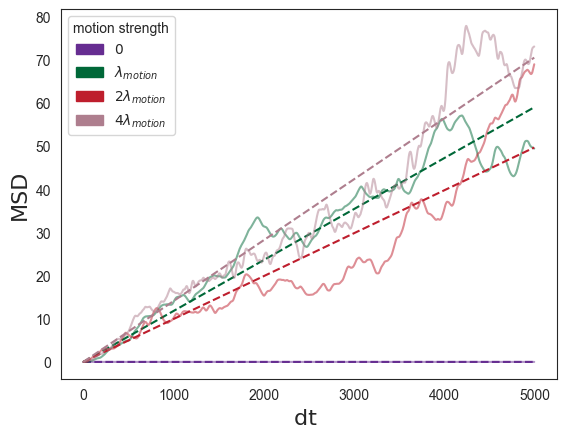

In [252]:
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.patches import Patch

import os
os.chdir("C:\\tmp\\differential_motion\\")

with open(f"data_test_speed10_msd.json", 'r') as f6:
    msd1 = json.load(f6)
with open(f"data_test_speed20_msd.json", 'r') as f6:
    msd2 = json.load(f6)
with open(f"data_test_speed30_msd.json", 'r') as f6:
    msd3 = json.load(f6)
with open(f"data_test_speed40_msd.json", 'r') as f6:
    msd4 = json.load(f6)
with open(f"data_test_speed50_msd.json", 'r') as f6:
    msd5 = json.load(f6)

merged_dict = {}
for key in msd1:
    merged_dict[key] = [(msd1[key][i] + msd2[key][i] + msd3[key][i] + msd4[key][i] + msd5[key][i]) / 5 for i in range(len(msd1[key]))]

print(merged_dict)

color_palette = ['#662D91', '#006838', '#BE1E2D', '#AE7E8E']

# Create a list to store legend handles
legend_handles = []

# Define the legend labels
legend_labels = [r'0', r'$\lambda_{motion}$', r'2$\lambda_{motion}$', r'4$\lambda_{motion}$']

# Create a list to store mean speeds
mean_speeds = []

# Plot each track
for idx, (key, values) in enumerate(merged_dict.items()):
    # Get the color based on the index in the color palette
    color = color_palette[idx % len(color_palette)]

    plt.plot(values, color=color, alpha=0.5)

    # Create a legend handle with the plot
    legend_handle = Patch(color=color, label=legend_labels[idx])
    legend_handles.append(legend_handle)

    # Convert the cumulative_list to numpy array and reshape it
    y = np.array(values)

    # Create a corresponding array of indices as the independent variable
    X = np.arange(len(values)).reshape(-1, 1)

    # Fit the linear regression model
    reg = LinearRegression(fit_intercept=False).fit(X, y)

    # Infer y
    y_pred = reg.predict(X)

    # Print the slope (coefficient) and intercept of the linear regression model
    print("Slope (Coefficient):", f"{reg.coef_[0]:.6f}")

    plt.plot(X,y_pred, '--', color=color)



# Set the font properties for the legend
legend_font_props = {'family': 'Myriad Pro', 'size': 10}
plt.legend(handles=legend_handles, title='motion strength', prop=legend_font_props)

# Set the font properties for the axis labels
axis_label_font_props = {'family': 'Myriad Pro', 'size': 16}
plt.xlabel(r'dt ', fontdict=axis_label_font_props)
plt.ylabel(r'MSD', fontdict=axis_label_font_props)

# Save the plot to the data folder
plt.savefig(f"msd.png", transparent=False, dpi=500)

# Display the plot
plt.show()


## for single cell

dict_values([[2.6402662819555655e-08, 1.7886551151778083e-08, 4.1877598969868584e-08, 5.0017986445701306e-08, 3.516555335571901e-08, 6.910426871413401e-08, 9.5707906631132e-08, 1.9569547219415504e-08, 3.05129033406839e-08, 2.462214705533446e-08, 2.5614397535131432e-08, 4.1448321647545447e-08, 3.5870216452297024e-08, 2.2719147794957663e-08, 1.7790667776850203e-08, 1.7885357422954165e-08, 1.3965316141257059e-08, 1.692281441016171e-08, 1.3485827130674632e-08, 1.574649879694943e-08, 3.0728880414043374e-08, 2.323441611360988e-08, 1.0508963339383736e-08, 9.51742430892385e-09, 2.8891497940171635e-08, 8.84991819254508e-09, 1.7273281239149805e-08, 2.1990945101711485e-08, 8.059776140105686e-08, 6.470764438498908e-08, 2.779998157542396e-08, 3.861472775347089e-08, 2.9108597182857592e-08, 2.6185182084448213e-08, 2.004461053845701e-08, 2.7760545613535835e-08, 2.5282472119795558e-08, 1.8258070701176097e-08, 8.630487638195419e-09, 2.566988494801959e-08, 3.693883869824532e-08, 2.565543298526455e-08, 1.

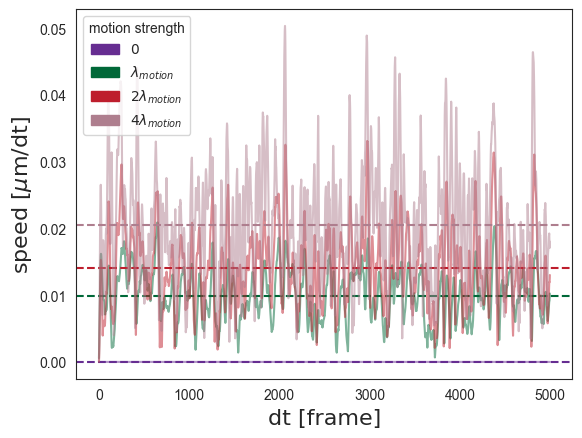

In [308]:
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.patches import Patch

import os
os.chdir("C:\\tmp\\differential_motion\\seed100")

with open(f"data_motion0_uni1_speed.json", 'r') as f6:
    speed1 = json.load(f6)
with open(f"data_motion500_uni1_speed.json", 'r') as f6:
    speed2 = json.load(f6)
with open(f"data_motion1000_uni1_speed.json", 'r') as f6:
    speed3 = json.load(f6)
with open(f"data_motion2000_uni1_speed.json", 'r') as f6:
    speed4 = json.load(f6)

data_merged = [speed1, speed2, speed3, speed4]
print(speed1.values())

color_palette = ['#662D91', '#006838', '#BE1E2D', '#AE7E8E']

# Create a list to store legend handles
legend_handles = []

# Define the legend labels
legend_labels = [r'0', r'$\lambda_{motion}$', r'2$\lambda_{motion}$', r'4$\lambda_{motion}$']

# Create a list to store mean speeds
mean_speeds = []

# Plot each track
for idx, dict in enumerate(data_merged):
    # Get the color based on the index in the color palette

    keys = list(dict.keys())
    values = list(dict.values())[0]
    x_values = range(len(values))

    color = color_palette[idx % len(color_palette)]

    plt.plot(values, color=color, alpha=0.5)
    # Calculate the mean of the track
    track_mean = np.mean(values)
    # Plot the mean as a horizontal line
    plt.axhline(track_mean, color=color, linestyle='--')

    # Create a legend handle with the plot
    legend_handle = Patch(color=color, label=legend_labels[idx])
    legend_handles.append(legend_handle)


# Set the font properties for the legend
legend_font_props = {'family': 'Myriad Pro', 'size': 10}
plt.legend(handles=legend_handles, title='motion strength', prop=legend_font_props)

# Set the font properties for the axis labels
axis_label_font_props = {'family': 'Myriad Pro', 'size': 16}
plt.xlabel(r'dt [frame]', fontdict=axis_label_font_props)
plt.ylabel(r'speed [$\mu$m/dt]', fontdict=axis_label_font_props)

# Save the plot to the data folder
plt.savefig(f"speed_single_cell_seed100.png", transparent=False, dpi=500)


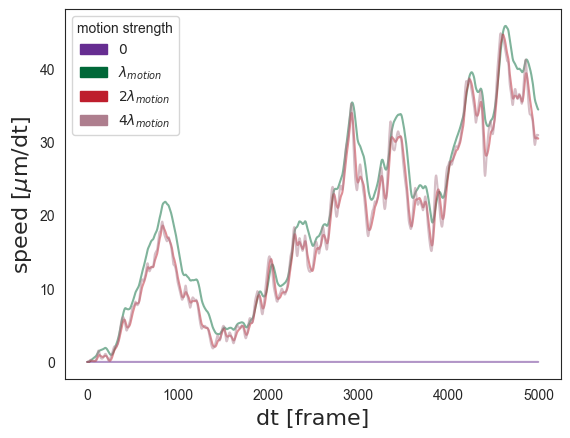

In [307]:
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.patches import Patch

import os
os.chdir("C:\\tmp\\differential_motion\\seed100")

with open(f"data_motion0_uni1_msd.json", 'r') as f6:
    msd1 = json.load(f6)
with open(f"data_motion500_uni1_msd.json", 'r') as f6:
    msd2 = json.load(f6)
with open(f"data_motion1000_uni1_msd.json", 'r') as f6:
    msd3 = json.load(f6)
with open(f"data_motion2000_uni1_msd.json", 'r') as f6:
    msd4 = json.load(f6)

data_merged = [msd1, msd2, msd3, msd4]

color_palette = ['#662D91', '#006838', '#BE1E2D', '#AE7E8E']

# Create a list to store legend handles
legend_handles = []

# Define the legend labels
legend_labels = [r'0', r'$\lambda_{motion}$', r'2$\lambda_{motion}$', r'4$\lambda_{motion}$']

# Create a list to store mean speeds
mean_speeds = []

# Plot each track
for idx, dict in enumerate(data_merged):
    # Get the color based on the index in the color palette

    keys = list(dict.keys())
    values = list(dict.values())[0]
    x_values = range(len(values))

    color = color_palette[idx % len(color_palette)]

    plt.plot(values, color=color, alpha=0.5)

    # Create a legend handle with the plot
    legend_handle = Patch(color=color, label=legend_labels[idx])
    legend_handles.append(legend_handle)


# Set the font properties for the legend
legend_font_props = {'family': 'Myriad Pro', 'size': 10}
plt.legend(handles=legend_handles, title='motion strength', prop=legend_font_props)

# Set the font properties for the axis labels
axis_label_font_props = {'family': 'Myriad Pro', 'size': 16}
plt.xlabel(r'dt [frame]', fontdict=axis_label_font_props)
plt.ylabel(r'speed [$\mu$m/dt]', fontdict=axis_label_font_props)

# Save the plot to the data folder
plt.savefig(f"msd_single_cell_seed100.png", transparent=False, dpi=500)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.patches import Patch

import os
os.chdir("C:\\tmp\\differential_motion\\seed100")

with open(f"data_motion500_uni1_speed.json", 'r') as f6:
    speed1 = json.load(f6)
with open(f"data_motion500_uni3_speed.json", 'r') as f6:
    speed2 = json.load(f6)
with open(f"data_motion500_uni5_speed.json", 'r') as f6:
    speed3 = json.load(f6)
with open(f"data_motion500_uni10_speed.json", 'r') as f6:
    speed4 = json.load(f6)

data_merged = [speed1, speed2, speed3, speed4]
print(speed1.values())

color_palette = ['#662D91', '#006838', '#BE1E2D', '#AE7E8E']

# Create a list to store legend handles
legend_handles = []

# Define the legend labels
legend_labels = [r'$[-0.1; 0.1]$', r'$[-0.3; 0.3]$', r'$[-0.5; 0.5]$', r'$[-1; 1]$']

# Create a list to store mean speeds
mean_speeds = []

# Plot each track
for idx, dict in enumerate(data_merged):
    # Get the color based on the index in the color palette

    keys = list(dict.keys())
    values = list(dict.values())[0]
    x_values = range(len(values))

    color = color_palette[idx % len(color_palette)]

    plt.plot(values, color=color, alpha=0.5)
    # Calculate the mean of the track
    track_mean = np.mean(values)
    # Plot the mean as a horizontal line
    plt.axhline(track_mean, color=color, linestyle='--')

    # Create a legend handle with the plot
    legend_handle = Patch(color=color, label=legend_labels[idx])
    legend_handles.append(legend_handle)


# Set the font properties for the legend
legend_font_props = {'family': 'Myriad Pro', 'size': 10}
plt.legend(handles=legend_handles, title='motion strength', prop=legend_font_props)

# Set the font properties for the axis labels
axis_label_font_props = {'family': 'Myriad Pro', 'size': 16}
plt.xlabel(r'dt [frame]', fontdict=axis_label_font_props)
plt.ylabel(r'speed [$\mu$m/dt]', fontdict=axis_label_font_props)

# Save the plot to the data folder
plt.savefig(f"speed_single_cell_seed100.png", transparent=False, dpi=500)


In [254]:
'''avg_msd = {}
std_dev_msd = {}

# Iterate over the keys in msd0 (assuming it has the same keys as the other msd variables)
for key in msd0.keys():
    msd_values = [list(itertools.accumulate(msd[key])) for msd in msd_vars]
    avg_msd[key] = np.mean(msd_values, axis=0)
    std_dev_msd[key] = np.std(msd_values, axis=0)'''

'avg_msd = {}\nstd_dev_msd = {}\n\n# Iterate over the keys in msd0 (assuming it has the same keys as the other msd variables)\nfor key in msd0.keys():\n    msd_values = [list(itertools.accumulate(msd[key])) for msd in msd_vars]\n    avg_msd[key] = np.mean(msd_values, axis=0)\n    std_dev_msd[key] = np.std(msd_values, axis=0)'

In [255]:
'''legend_str = list()
count = 0 
#colors = ['red', 'orangered', 'indianred', 'maroon']
colors = ['red', 'green', 'purple', 'orange']
strength = [0, 500, 1000, 2000]

for key, avg_val in avg_msd.items(): 
    #log_idx = [math.log(x) for x in idx]
    #cumulative_idx = list(itertools.accumulate(idx))
    #log_cumulative_idx = [math.log(x) for x in cumulative_idx]

    # Convert the cumulative_list to numpy array and reshape it
    y = np.array(avg_val)

    # Create a corresponding array of indices as the independent variable
    X = np.arange(len(times1)/2 -1 ).reshape(-1, 1)

    # Fit the linear regression model
    reg = LinearRegression().fit(X, y)

    # Infer y
    y_pred = reg.predict(X)

    # Print the slope (coefficient) and intercept of the linear regression model
    print("Slope (Coefficient):", f"strength = {strength[count]}; {reg.coef_[0]:.6f}")
    #print("Intercept:", reg.intercept_)
    #legend_str.append(f" {reg.coef_[0]:.9f}")

    # Plot
    #plt.plot(X,y_pred, '--')
    #plt.plot(X, idx, label = f"{reg.coef_[0]:.6f}")

    # Plot mean with standard deviation
    plt.errorbar(X, avg_val, yerr = std_dev_msd[key], fmt='-', 
                color = colors[count], ecolor = colors[count], 
                label = f"{reg.coef_[0]:.6f}", linewidth = 0.5, 
                alpha = 0.8, 
                capsize = 0, elinewidth = 0.01, capthick = 0.2)
    # yerr=std_dev_msd[key],
    count += 1

# Create two separate legends
legend1 = plt.legend(title = 'self-diffusivity (slope)\n', bbox_to_anchor=(0.55, 0.821), loc='center right')
legend2 = plt.legend(['0', '500', '1000', '2000'], title = 'motion strength \n', loc='upper left')

# Add the legends to the plot
#plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
# labels and legend
plt.ylabel(r'MSD [-]')
plt.xlabel(r'frame [-]')
#plt.legend(title = r'$falloff\_power = 0;   strength = -1000$')
#plt.legend([r'$motion = 750$', r'$motion = 250$', r'n=5'])
#plt.text(0.95, 0.05, r'n=5', ha='right', va='bottom', transform=plt.gca().transAxes)
locs, labels = xticks()

# plot save to data foler
plt.savefig(f"MSD.png", transparent = False, dpi=500)'''

'legend_str = list()\ncount = 0 \n#colors = [\'red\', \'orangered\', \'indianred\', \'maroon\']\ncolors = [\'red\', \'green\', \'purple\', \'orange\']\nstrength = [0, 500, 1000, 2000]\n\nfor key, avg_val in avg_msd.items(): \n    #log_idx = [math.log(x) for x in idx]\n    #cumulative_idx = list(itertools.accumulate(idx))\n    #log_cumulative_idx = [math.log(x) for x in cumulative_idx]\n\n    # Convert the cumulative_list to numpy array and reshape it\n    y = np.array(avg_val)\n\n    # Create a corresponding array of indices as the independent variable\n    X = np.arange(len(times1)/2 -1 ).reshape(-1, 1)\n\n    # Fit the linear regression model\n    reg = LinearRegression().fit(X, y)\n\n    # Infer y\n    y_pred = reg.predict(X)\n\n    # Print the slope (coefficient) and intercept of the linear regression model\n    print("Slope (Coefficient):", f"strength = {strength[count]}; {reg.coef_[0]:.6f}")\n    #print("Intercept:", reg.intercept_)\n    #legend_str.append(f" {reg.coef_[0]:.9f}")

# Contact area

In [8]:
os.chdir("C:\\tmp\\paper_data\\adhesion_paper\\")

with open(f"data1_contact_ratios.json", 'r') as f6:
    ratios1 = json.load(f6)
    # Extract the keys and values from the dictionary
    # Remove underscores from keys
    keys = [key.replace('_', '') for key in ratios1.keys()]
    values = [value[0] for value in ratios1.values()]

with open(f"data2_contact_ratios.json", 'r') as f6:
    ratios2 = json.load(f6)

with open(f"data3_contact_ratios.json", 'r') as f6:
    ratios3 = json.load(f6)

with open(f"data4_contact_ratios.json", 'r') as f6:
    ratios4 = json.load(f6)

with open(f"data5_contact_ratios.json", 'r') as f6:
    ratios5 = json.load(f6)

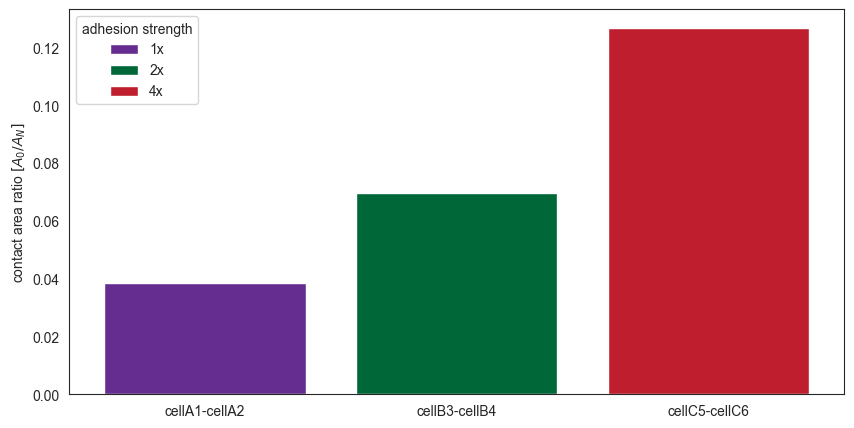

In [9]:

# Define the figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Define a color palette
color_palette = ['#662D91', '#006838', '#BE1E2D']

# Assign colors to bars based on their order
bar_colors = [color_palette[i % len(color_palette)] for i in range(len(keys))]

# Plot the data with customized colors
plt.bar(keys, values, color=bar_colors)
#plt.xticks(rotation=45)

plt.ylabel(r'contact area ratio $[A_0/A_N]$')

# Create custom legend handles
legend_handles = [Patch(facecolor=color_palette[i % len(color_palette)], label=label)
                  for i, label in enumerate(['1x', '2x', '4x'])]

# Add legend with custom handles
plt.legend(handles=legend_handles, title='adhesion strength')
# Set the figure size
#fig.set_size_inches(5, 6)
#plt.tight_layout()


# Save the plot
plt.savefig("contact_ratios.png", transparent=False, dpi=500)

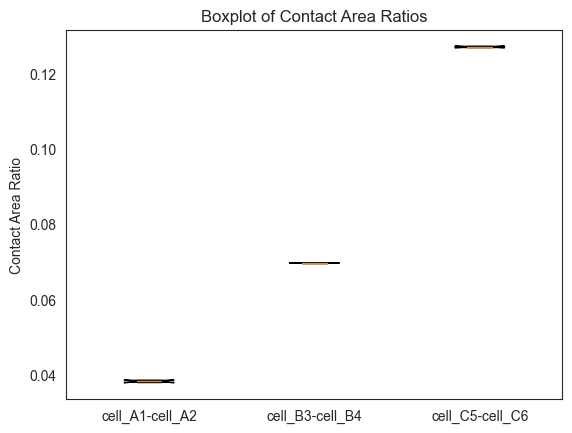

In [10]:

# Combine values from both dictionaries
values = [ratios1[key] + ratios2[key] + ratios3[key] + ratios4[key] for key in ratios1]

# Create labels from dictionary keys
labels = list(ratios1.keys())

# Plot the boxplot
plt.boxplot(values, patch_artist=True, notch=True, vert=True, labels=labels)

# Add labels and title
plt.ylabel('Contact Area Ratio')
plt.title('Boxplot of Contact Area Ratios')

# Save the plot
plt.savefig("contact_ratios_boxplot.png", transparent=False, dpi=500)

{'cell_A1-cell_A2': [0.03848682694240076, 0.03848682694240076, 0.03795171529164701, 0.03795171529164701, 0.03795171529164701], 'cell_B3-cell_B4': [0.06964820577411933, 0.06964820577411933, 0.06965595684481907, 0.06965595684481907, 0.06965595684481907], 'cell_C5-cell_C6': [0.12688215583533263, 0.12688215583533263, 0.1271906784178395, 0.1271906784178395, 0.1271906784178395]}
[0.00026215009995301906, 3.7972336349191e-06, 0.00015114458025350307]


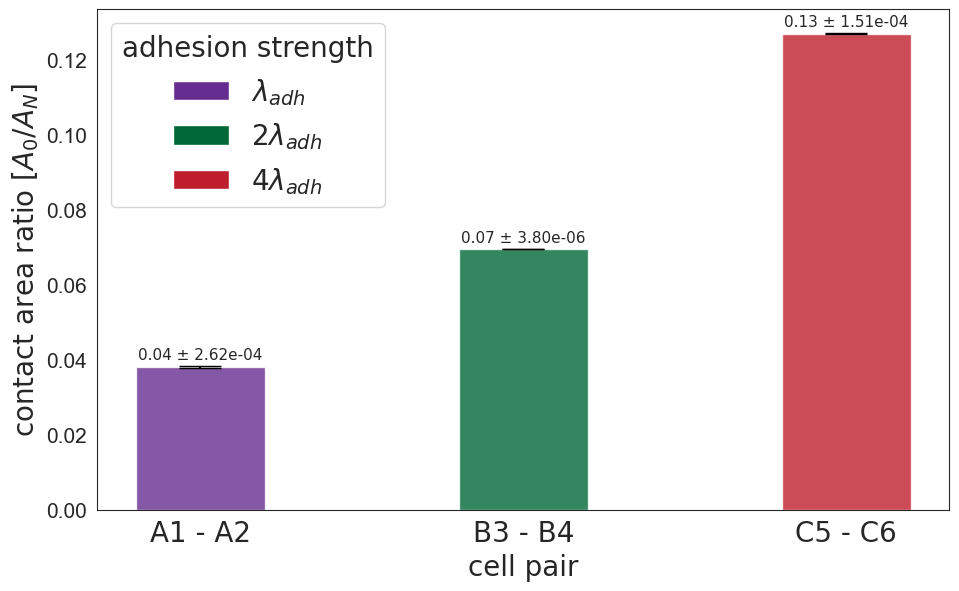

In [49]:
# Define the figure size
fig, ax = plt.subplots(figsize=(11, 6.5))

# Define a color palette
color_palette = ['#662D91', '#006838', '#BE1E2D']
font_props = {'family': 'Myriad Pro', 'size': 20}
font_props_text = {'family': 'Myriad Pro', 'size': 11}
title_font = FontProperties(family='Myriad Pro',  size=20)

# Assign colors to bars based on their order
bar_colors = [color_palette[i % len(color_palette)] for i in range(len(keys))]

# Combine dictionaries
combined_dict = {}
for key in ratios1:
    if key in ratios2:
        combined_dict[key] = ratios1[key] + ratios2[key] + ratios3[key] + ratios4[key] + ratios5[key]

print(combined_dict)

# Calculate the mean and standard deviation
values = [np.mean(combined_dict[key]) for key in combined_dict]
std = [np.std(combined_dict[key]) for key in combined_dict]
print(std)

# Create labels from dictionary keys
labels = [key.replace('_', '') for key in combined_dict.keys()]
labels = [key.replace('-', ' - ') for key in labels]
labels = [key.replace('cell', '') for key in labels]
# Convert labels to strings explicitly
labels = [str(label) for label in labels]

# Set the width of the bars
#bar_width = 0.35

# Set the positions of the x-axis ticks
x = np.arange(len(labels))

# Plot the bar plot with error bars
plt.bar(x, values, width = 0.4, yerr=std, capsize=15,color=bar_colors, alpha=.8)

# Add labels and title
plt.ylabel(r'contact area ratio $[A_0/A_N]$', fontproperties=font_props)
plt.xlabel(r'cell pair', fontproperties=font_props)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)

# Set the x-axis tick labels
plt.xticks(x, labels, fontproperties=font_props)

# Create custom legend handles
legend_handles = [Patch(facecolor=color_palette[i % len(color_palette)], label=label)
                  for i, label in enumerate([r'$\lambda_{adh}$', r'2$\lambda_{adh}$', r'4$\lambda_{adh}$'])]

# Add legend with custom handles
plt.legend(handles=legend_handles, title='adhesion strength', title_fontproperties= font_props, prop = font_props)
# Set the figure size

# Add text box with std dev values
offset = 0.001  # Adjust the offset value as needed
for x, value, std_dev in zip(x, values, std):
    std_dev_str = "{:.2e}".format(std_dev)
    text = f"{value:.2f} \u00B1 {std_dev_str}"
    plt.text(x, value + std_dev + offset, text, ha='center', va='bottom', fontdict=font_props_text)

#plt.subplots_adjust(bottom=0.2)
# Save the plot
plt.savefig("contact_ratios.png", transparent=False, dpi=500)